# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [9]:
!pip install scikit-learn

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [11]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-10-29 13:37:57--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-10-29 13:37:57--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [12]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [13]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [14]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [15]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

### **3.3. Let's examine the data dimension**

In [16]:
X.shape

(4695, 881)

In [17]:
Y.shape

(4695,)

### **3.4. Remove low variance features**

In [18]:
#from sklearn.feature_selection import VarianceThreshold
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
#X = selection.fit_transform(X)
import numpy as np
np.float = float  # temporary fix for old scikit-learn

from sklearn.feature_selection import VarianceThreshold

# Keep only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Apply VarianceThreshold on numeric data
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reduced = selection.fit_transform(X_numeric)

print("Original shape:", X_numeric.shape)
print("After variance threshold:", X_reduced.shape)


Original shape: (4695, 881)
After variance threshold: (4695, 137)


In [19]:
X.shape

(4695, 881)

## **4. Data split (80/20 ratio)**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
X_train.shape, Y_train.shape

((3756, 881), (3756,))

In [22]:
X_test.shape, Y_test.shape

((939, 881), (939,))

## **5. Building a Regression Model using Random Forest**

In [23]:
#model = RandomForestRegressor(n_estimators=100)
#model.fit(X_train, Y_train)
#r2 = model.score(X_test, Y_test)
#r2
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Temporary fix for deprecated np.float
np.float = float  

# Keep only numeric columns
X_numeric = X.select_dtypes(include=[np.number])
Y_numeric = Y  # make sure Y is numeric too

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_numeric, Y_numeric, test_size=0.2, random_state=42
)

# Fit RandomForest
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

# Check R2
r2 = model.score(X_test, Y_test)
print("R2 score:", r2)


R2 score: 0.5481739567276986


In [24]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [25]:
from sklearn.feature_selection import VarianceThreshold

# Remove only features that are constant
selector = VarianceThreshold(threshold=0.0)
X_reduced = selector.fit_transform(X_numeric)
X_reduced = pd.DataFrame(X_reduced, columns=X_numeric.columns[selector.get_support()])

print("Reduced from", X_numeric.shape[1], "to", X_reduced.shape[1], "features.")


Reduced from 881 to 629 features.


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_reduced, Y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("R2:", r2_score(Y_test, y_pred))
print("MSE:", mean_squared_error(Y_test, y_pred))

R2: 0.5408443016888168
MSE: 1.1075630048500833


<function matplotlib.pyplot.show(close=None, block=None)>

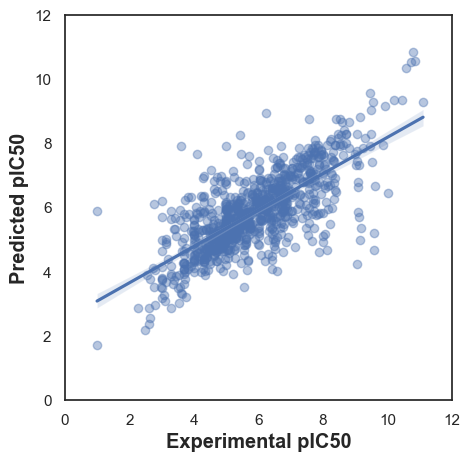

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show